# Plotting Fluxes

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

## Reading files, and saving energy spectrum
 The following function reads the neutrino event sample, and returns a energy histogram of interacting neutrino events. For this, one needs to provide `filenames` of flux input files, the exepriments dimensions `xmin`, `xmax`, `ymin`, `ymax`, the detectors distance to the IP `posz` and the luminosity in inverse femtobarn `lumi`.  The output will be a pandas dataframe with the neutrino particle ID `vpid`, the parent hadron particle ID `hpid`, the neutrino energy `en` and the event weight `wgt` (in units of neutrinos expected to pass through the specified detector). 

In [2]:
#specify input files
filenames = ["files/Run3_light_DPMJET.txt","files/Run3_charm_DPMJET.txt"]

# specify detector 
xmin = -0.2
xmax = 0.2
ymin = -0.2
ymax = 0.2
lumi = 150
posz = 480
    
# read files
fmt   = {'vpid': 'int', 'hpid': 'int', 'x0': 'float', 'y0': 'float', 'z0': 'float', 'thx': 'float', 'thy': 'float', 'en': 'float', 'w': 'float'}
names = fmt.keys()
sample = pd.DataFrame()
for filename_input in filenames:
    for data in pd.read_csv(filename_input, dtype=fmt, chunksize=50000, delim_whitespace=True, names=names):
        data['x'] = data['x0'] + data['thx']*(posz-480)
        data['y'] = data['y0'] + data['thy']*(posz-480)
        data = data[(data['x']>xmin) & (data['x']<xmax)]
        data = data[(data['x']>ymin) & (data['x']<ymax)]
        data['wgt'] = data['w']*1000*lumi 
        data = data[['vpid','hpid','en','wgt']]
        sample = pd.concat([sample, data])

## Plotting the energy spectrum

Now we can simply plot the energy spectra for the different neutrinos. Note that the events are weighted, so we need to specify the `weights` in `plt.hist()`. 

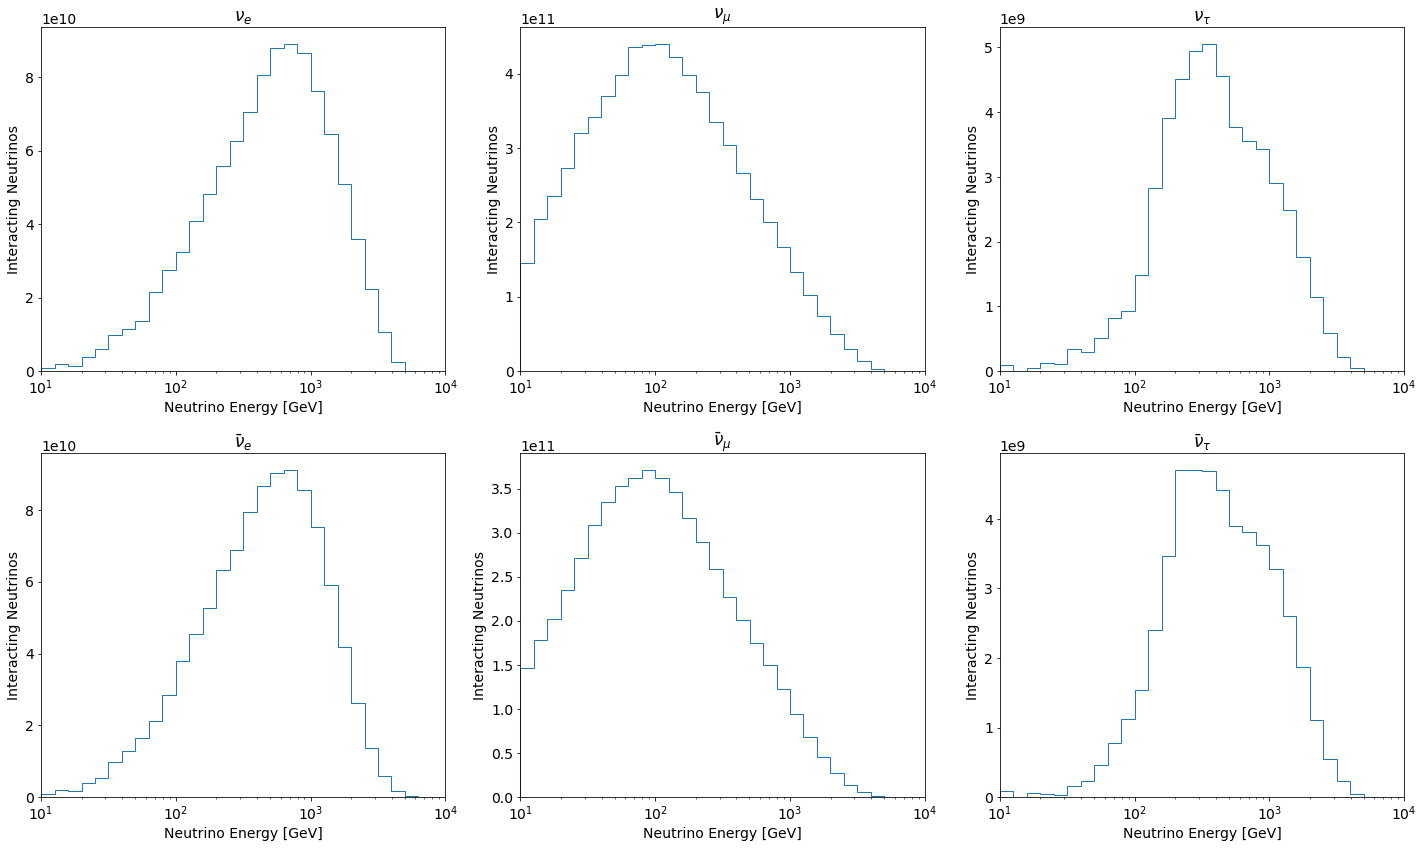

In [3]:
# setup figure
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams['text.usetex'] = False
fig = plt.figure(figsize=(20,12))
vpids = {12:r"$\nu_e$", 14:r"$\nu_\mu$", 16:r"$\nu_\tau$", -12:r"$\bar\nu_e$", -14:r"$\bar\nu_\mu$", -16:r"$\bar\nu_\tau$"}
ebins = np.logspace(1,4,30+1) 
    
# plot
for ivpid, vpid in enumerate(vpids.keys()):
    ax = plt.subplot(2,3,1+ivpid)   
    selection = sample[sample['vpid']==vpid]
    ax.hist(selection['en'], weights=selection['wgt'], histtype='step', bins=ebins)
    ax.set_xlim(10, 10000)
    ax.set_xscale("log")
    ax.set_xlabel(r"Neutrino Energy [GeV]")
    ax.set_ylabel(r"Interacting Neutrinos")
    ax.set_title(vpids[vpid])
plt.tight_layout()
plt.show()